<a href="https://colab.research.google.com/github/amiable17/STUDY_DeepLearning/blob/master/14_%EB%B2%A0%EC%8A%A4%ED%8A%B8%EB%AA%A8%EB%8D%B8%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모두의 딥러닝**
## 넷째마당-딥러닝 기본기 다지기

### 14장 베스트 모델 만들기
> 와인의 종류 예측하기

#### **모델업데이트하기**
> * keras.callbacks의 ModelCheckpoint를 이용해서 모니터링할 값을 지정하여 모델 저장에 옵션을 줄 수 있음
```
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
```
>> monitor: 모니터할 값 지정(acc, loss, val_loss, val_acc)  
verbose: 해당 함수의 진행 사항 출력 여부 지정(1=출력, 0=미출력)  
save_best_only=Treu: 모델이 앞서 저장한 모델보다 나아졌을 때만 저장  

#### **과적합이 되지 않도록 그래프로 확인하기**
> * 학습셋의 정확도는 epoch가 늘어날수록 좋아지지만, 테스트셋의 정확도는 어느정도 이상 시간이 흐르면 더 이상 좋아지지 않음. 
* 그래프를 통해 확인하며 적정한 epoch를 찾아보기

#### **학습 자동 중단(early stopping)**
> * 너무 많은 epoch은 overfitting을, 너무 적은 epoch은 underfitting을 발생시킴. -> epoch를 많이 주고, 특정시점에 멈추게 하자  
* 학습이 진행되어도 테스트셋의 오차가 줄지 않으면 학습을 멈춤.  
* keras.callbacks의 EarlyStopping 이용하여 자동 중단 설정하기.
```
from keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStropping(monitor='val_loss', patience=100)
model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback])
```
>> monitor: 모니터할 성능(performance measure) 지정  
mode: performance measure가 최소화 시켜야하는 것이면 min, 최대화 시켜야하는 것이면, max. (default = auto)  
patience: 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정.
>>> 성능의 증가 기준, 또는 특정 값에 도달하게 할 수 있음
```
EarlyStopping(monitor='val_loss', min_delta = 1)   # val_loss가 1% 증가하지 않는 경우
EarlyStopping(monitor='val_loss', baseline = 0.4)  # val_loss가 0.4에 도달했을 경우
```


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import files

import pandas as pd, numpy as np, io, os
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
# 데이터 로드
uploaded = files.upload()
df_pre = pd.read_csv(io.StringIO(uploaded['wine.csv'].decode('utf-8')), header=None)
print(df_pre.shape)
df_pre.sample(5) 

Saving wine.csv to wine.csv
(6497, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [0]:
df = df_pre.sample(frac=.15)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [0]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR) 

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [0]:
# 돌아가면 삭제
# # 모델 실행
# model.fit(X, Y, epochs = 200, batch_size = 200, validation_split=0.2, verbose=0, callbacks=[checkpointer])

# # 결과 출력
# print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

In [0]:
# 모델 실행 및 저장
history = model.fit(X, Y, epochs = 3500, batch_size = 500, validation_split=0.33, callbacks=[checkpointer])

# 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']
# 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']




Train on 653 samples, validate on 322 samples
Epoch 1/3500





653/653 [==============================] - 1s 1ms/step - loss: 0.7806 - acc: 0.7688 - val_loss: 0.8397 - val_acc: 0.7360

Epoch 00001: val_loss improved from inf to 0.83970, saving model to ./model/01-0.8397.hdf5
Epoch 2/3500
653/653 [==============================] - 0s 10us/step - loss: 0.7002 - acc: 0.7688 - val_loss: 0.7330 - val_acc: 0.7360

Epoch 00002: val_loss improved from 0.83970 to 0.73297, saving model to ./model/02-0.7330.hdf5
Epoch 3/3500
653/653 [==============================] - 0s 11us/step - loss: 0.6128 - acc: 0.7688 - val_loss: 0.6257 - val_acc: 0.7360

Epoch 00003: val_loss improved from 0.73297 to 0.62568, saving model to ./model/03-0.6257.hdf5
Epoch 4/3500
653/653 [==============================] - 0s 12us/step - loss: 0.5240 - acc: 0.7688 - val_loss: 0.5213 - val_acc: 0.7422

Epoch 00004: val_loss improved from 0.62568 to 0.52129, saving model to ./model/04-0.5213.hdf5
Epoch 5/3500
653/653 [=====

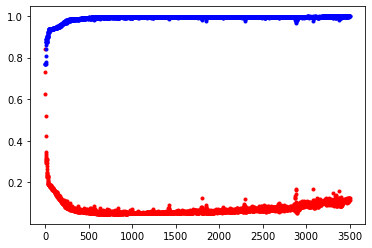

In [0]:
# 결과 그래프로 그려보기
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import files

import pandas as pd, numpy as np, os, tensorflow as tf, io

In [0]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
# 데이터 불러오기
uploaded = files.upload()
df_pre = reaa_csv(io.StringIO(uploaded['wine.csv'].decode('utf-8')), header = None)
df = df_pre.sample(frac = 0.15)      # 전체 샘플의 15%만 사용
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

Saving wine.csv to wine (1).csv


NameError: ignored

In [0]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [0]:
# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [0]:
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.97520, saving model to ./model/01-0.9752.hdf5

Epoch 00002: val_loss improved from 0.97520 to 0.83932, saving model to ./model/02-0.8393.hdf5

Epoch 00003: val_loss improved from 0.83932 to 0.71039, saving model to ./model/03-0.7104.hdf5

Epoch 00004: val_loss improved from 0.71039 to 0.58973, saving model to ./model/04-0.5897.hdf5

Epoch 00005: val_loss improved from 0.58973 to 0.48036, saving model to ./model/05-0.4804.hdf5

Epoch 00006: val_loss improved from 0.48036 to 0.38701, saving model to ./model/06-0.3870.hdf5

Epoch 00007: val_loss improved from 0.38701 to 0.31856, saving model to ./model/07-0.3186.hdf5

Epoch 00008: val_loss improved from 0.31856 to 0.29084, saving model to ./model/08-0.2908.hdf5

Epoch 00009: val_loss did not improve from 0.29084

Epoch 00010: val_loss did not improve from 0.29084

Epoch 00011: val_loss did not improve from 0.29084

Epoch 00012: val_loss did not improve from 0.29084

Epoch 00013: val_loss impro

전체 반복값(epochs)을 3500으로 설정했으나 682회만 수행. 이후 100번가량 모델이 나아지지 않자 학습 자동 중단.